In [1]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv('order.csv')
t = data.iloc[:, -8:]
t

,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...
29995,5.80,0.00,51.30,0.00,0.00,0.00,0.0,42.9
29996,0.00,0.00,0.00,0.00,100.00,0.00,0.0,0.0
29997,9.25,0.00,77.48,13.27,0.00,0.00,0.0,0.0
29998,0.00,0.00,100.00,0.00,0.00,0.00,0.0,0.0


In [6]:
class KMeans:
    """KMeans clustering algorithm."""
    def __init__(self, k, times):
        """初始化方法
        
        Parameters
        ----
        k : int 
            聚类的个数
        times : int
            聚类迭代次数
        """
        self.k = k
        self.times = times
    
    def fit(self, X):
        """根据提供的训练数据 对模型进行训练
        
        Parameters
        -----
        X : 类数组类型。形状：[样本数量，特征数量]
            待训练的样本特征属性
        """
        X = np.asarray(X)
        # 设置随机种子 以便于可以相同的随机序列 可以重现随机结果
        np.random.seed(0)
        # 从数组 X 中随机选取 k 个不同的样本，作为 K-means 算法的初始聚类中心 一会还会进行迭代调整
        self.cluster_centers =  X[np.random.randint(0, len(X), self.k)]
        self.labels_ = np.zeros(len(X))
        
        for t in range(self.times):
            for index, x in enumerate(X):
                # 计算每个样本与聚类中心的距离
                dis = np.sqrt(np.sum((x - self.cluster_centers) ** 2, axis=1))
                # 将最小距离的索引赋值给标签数组 索引的值就是当前点所属的簇 范围为[0, k - 1]
                self.labels_[index] = dis.argmin()
            # 循环更新聚类中心
            for i in range(self.k):
                # 计算每个簇内所有点的均值 更新聚类中心
                self.cluster_centers[i] = np.mean(X[self.labels_ == i], axis=0)
    
    def predict(self, X):
        """根据参数传递的参数 对样本数据进行预测 预测样本属于哪一个簇当中
        
        Parameters
        -----
        X : 类数组类型。形状：[样本数量，特征数量]
            待训练的样本特征属性
        
        Returns
        -----
        result : 数组类型
            预测的结果 每一个X所属的簇
        """
        
        X = np.asarray(X)
        result = np.zeros(len(X))
        # 使用 enumerate()：同时获取索引和值
        for index, x in enumerate(X):
            # 计算样本到每个聚类中心的聚集
            dis = np.sqrt(np.sum((x - self.cluster_centers) ** 2, axis=1))
            # 找到距离最近的聚类中心，划分类别
            result[index] = dis.argmin()
        return result
    

In [7]:
kmeans = KMeans(3, 50)
kmeans.fit(t)

In [8]:
kmeans.cluster_centers

array([[46.33977936,  8.93380516, 23.19047005, 13.11741633,  4.8107557 ,
         1.17283735,  1.35704647,  0.95392773],
       [19.5308009 , 50.42856608, 14.70652695,  7.89437019,  3.69829234,
         0.91000428,  1.92515077,  0.82113238],
       [ 7.93541008,  4.56182052, 30.65583437, 18.57726789,  8.61597195,
         1.28482514, 26.81950293,  1.30158264]])

In [ ]:
# 查看某个簇内的所有样本数据 
t[kmeans.labels_ == 0]

,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
15,48.23,20.37,15.38,8.29,7.73,0.0,0.0,0.0
23,24.10,22.29,38.69,14.92,0.00,0.0,0.0,0.0
24,36.51,31.93,27.18,4.38,0.00,0.0,0.0,0.0
40,22.76,0.00,0.00,77.24,0.00,0.0,0.0,0.0
43,65.64,12.36,21.99,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
29974,33.93,0.00,17.46,41.46,7.15,0.0,0.0,0.0
29977,45.10,0.00,26.68,28.22,0.00,0.0,0.0,0.0
29988,28.21,0.00,48.34,23.44,0.00,0.0,0.0,0.0
29989,61.32,0.00,23.34,15.34,0.00,0.0,0.0,0.0


In [12]:
kmeans.predict([[30, 30, 40, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 30, 30, 40], [30, 30, 0, 0, 0, 0, 20, 20]])

array([0., 2., 1.])

In [14]:
# .loc按照标签进行切片 和索引不同 前后都包含.iloc是index+loc
t2 = data.loc[:, "Food%":"Fresh%"]
kmeans = KMeans(3, 50)
kmeans.fit(t2)

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

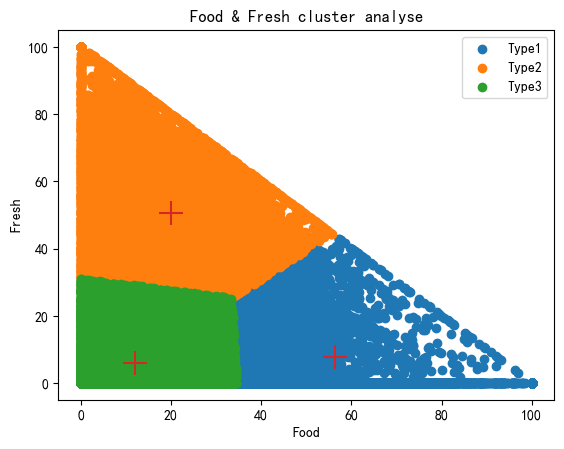

In [17]:
plt.Figure(figsize=(10, 10))
# 绘制每个类别的散点图
plt.scatter(t2[kmeans.labels_ == 0].iloc[:, 0], t2[kmeans.labels_ == 0].iloc[:, 1], label="Type1")
plt.scatter(t2[kmeans.labels_ == 1].iloc[:, 0], t2[kmeans.labels_ == 1].iloc[:, 1], label="Type2")
plt.scatter(t2[kmeans.labels_ == 2].iloc[:, 0], t2[kmeans.labels_ == 2].iloc[:, 1], label="Type3")
# 绘制聚类中心
plt.scatter(kmeans.cluster_centers[:, 0], kmeans.cluster_centers[:, 1], marker="+", s=300)
plt.title("Food & Fresh cluster analyse")
plt.xlabel("Food")
plt.ylabel("Fresh")
plt.legend()
plt.show()